In [175]:
import pandas as pd
import matplotlib.pyplot as plt
from khmernltk import word_tokenize
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [176]:
df = pd.read_excel('dataset.xlsx')

In [177]:
df.head()

,entity,label
0,អាហ្រ្វិកខាងត្បូង,LOC
1,ប្រទេសអូស្រ្តាលី,LOC
2,លោកអំសំអាត,PER
3,ជំងឺគ្រោះថ្នាក់សរសៃឈាមអាទែរ,DIS
4,អ៊ីស្រាអែល,LOC


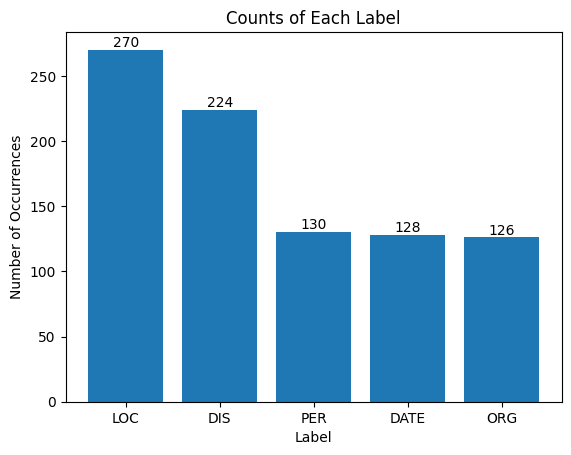

In [178]:
label_counts = df['label'].value_counts()

plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Number of Occurrences')
plt.title('Counts of Each Label')

# Add total number on each label
for i, v in enumerate(label_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [179]:
df['entity_token'] = df['entity'].apply(lambda x: word_tokenize(x))

In [180]:
df['prefix'] = df['entity_token'].apply(lambda x: x[0])
df['suffix'] = df['entity_token'].apply(lambda x: x[-1])

In [181]:
# train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [182]:
train_df = pd.read_excel('train_dataset.xlsx')
# test_df = pd.read_excel('test_dataset.xlsx')

In [183]:
test_df = pd.read_excel('testing_set3.xlsx')
test_df['entity_token'] = test_df['entity'].apply(lambda x: word_tokenize(x))

In [184]:
test_df['prefix'] = test_df['entity_token'].apply(lambda x: x[0])
test_df['suffix'] = test_df['entity_token'].apply(lambda x: x[-1])

In [185]:
test_df.shape

(176, 5)

In [186]:
# train_df.to_excel('train_dataset.xlsx', index=False)
# test_df.to_excel('test_dataset.xlsx', index=False)

In [187]:
# Check the sizes of the split datasets
print(f"Training set size: {len(train_df)}")
print(f"Testing set size: {len(test_df)}")

Training set size: 702
Testing set size: 176


In [188]:
# Group prefixes by label on the training set
prefixes_by_label_train = df.groupby('label')['prefix'].apply(list)
suffixes_by_label_train = df.groupby('label')['prefix'].apply(list)

# prefixes_by_label_train = train_df.groupby('label')['prefix'].apply(list)
# suffixes_by_label_train = train_df.groupby('label')['suffix'].apply(list)

In [189]:
# Extract each list
date_prefixes_train = list(set(prefixes_by_label_train.get("DATE", [])))
dis_prefixes_train = list(set(prefixes_by_label_train.get("DIS", [])))
loc_prefixes_train = list(set(prefixes_by_label_train.get("LOC", [])))
org_prefixes_train = list(set(prefixes_by_label_train.get("ORG", [])))
per_prefixes_train = list(set(prefixes_by_label_train.get("PER", [])))

date_suffixes_train = list(set(suffixes_by_label_train.get("DATE", [])))
dis_suffixes_train = list(set(suffixes_by_label_train.get("DIS", [])))
loc_suffixes_train = list(set(suffixes_by_label_train.get("LOC", [])))
org_suffixes_train = list(set(suffixes_by_label_train.get("ORG", [])))
per_suffixes_train = list(set(suffixes_by_label_train.get("PER", [])))

In [190]:
def classify_entity_by_prefix_suffix(entity, prefix, suffix):
    # Rule for Location
    if any(entity.startswith(loc_prefix) for loc_prefix in loc_prefixes_train) or any(entity.endswith(loc_suffix) for loc_suffix in loc_suffixes_train):
        return "LOC"
    
    # Rule for Person
    if any(entity.startswith(per_prefix) for per_prefix in per_prefixes_train) or any(entity.endswith(per_suffix) for per_suffix in per_suffixes_train):
        return "PER"
    
    # Rule for Disease
    if any(entity.startswith(dis_prefix) for dis_prefix in dis_prefixes_train) or any(entity.endswith(dis_suffix) for dis_suffix in dis_suffixes_train):
        return "DIS"
    
    # Rule for Organization
    if any(entity.startswith(org_prefix) for org_prefix in org_prefixes_train) or any(entity.endswith(org_suffix) for org_suffix in org_suffixes_train):
        return "ORG"
    
    # Rule for Date
    if any(entity.startswith(date_prefix) for date_prefix in date_prefixes_train) or any(entity.endswith(date_suffix) for date_suffix in date_suffixes_train):
        return "DATE"
    
    # Default: No entity detected
    return "O"

In [191]:
test_df['predicted_label'] = test_df.apply(lambda row: classify_entity_by_prefix_suffix(row['entity'], row['prefix'], row['suffix']), axis=1)

# Now evaluate the performance on the test set
true_labels_test = test_df['label']
predicted_labels_test = test_df['predicted_label']

In [192]:
test_df

,entity,label,entity_token,prefix,suffix,predicted_label
0,លោក​ឈាងរ៉ា,PER,"[លោក, ឈាង, រ៉ា]",លោក,រ៉ា,PER
1,លោក​លីសុវណ្ណ,PER,"[លោក, លី, សុវណ្ណ]",លោក,សុវណ្ណ,PER
2,អ្នកស្រី​គិន​ណារិន,PER,"[អ្នកស្រី, គិន, ណារិន]",អ្នកស្រី,ណារិន,PER
3,កុមារីប៊ៀនណារ៉ុង,PER,"[កុមារី, ប៊ៀន, ណារ៉ុង]",កុមារី,ណារ៉ុង,O
4,លោកប៊ៀនវន,PER,"[លោក, ប៊ៀន, វន]",លោក,វន,PER
...,...,...,...,...,...,...
171,សាកលវិទ្យាល័យភូមិន្ទនីតិសាស្រ្ដនិងវិទ្យាសាស្រ្...,ORG,"[សាកលវិទ្យាល័យ, ភូមិន្ទ, នីតិសាស្រ្ដ, និង, វិទ...",សាកលវិទ្យាល័យ,សេដ្ឋកិច្ច,LOC
172,ស្រុកសាមគ្គីមានជ័យ,LOC,"[ស្រុក, សាមគ្គី, មាន, ជ័យ]",ស្រុក,ជ័យ,LOC
173,ស្រុកកំពង់ត្រឡាច,LOC,"[ស្រុក, កំពង់ត្រឡាច]",ស្រុក,កំពង់ត្រឡាច,LOC
174,ស្រុកទឹកផុស,LOC,"[ស្រុក, ទឹក, ផុស]",ស្រុក,ផុស,LOC


In [193]:
print(classification_report(true_labels_test, predicted_labels_test))

              precision    recall  f1-score   support

        DATE       1.00      0.94      0.97        34
         DIS       1.00      0.79      0.88        24
         LOC       0.68      0.86      0.76        44
           O       0.00      0.00      0.00         0
         ORG       1.00      0.50      0.67        40
         PER       0.96      0.76      0.85        34

    accuracy                           0.77       176
   macro avg       0.77      0.64      0.69       176
weighted avg       0.91      0.77      0.81       176



C:\Users\Jin-Ohara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jin-Ohara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jin-Ohara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: Un